# **ABD'nin En Büyük Şirketleri Veri Analizi Projesi**

**Proje Amacı:**  
Wikipedia’dan çekilen ABD’nin en büyük 100 şirketine ait veriler üzerinde kapsamlı bir analiz yapmak.

## **1. Web Scraping ile Veri Çekme**

Wikipedia sayfasından şirket bilgileri web scraping yöntemiyle çekildi ve BeautifulSoup kullanıldı.

In [1]:
from bs4 import BeautifulSoup  # HTML ve XML dokümanlarını parse etmek için BeautifulSoup kütüphanesini içe aktarır
import requests               # HTTP istekleri yapmak için requests kütüphanesini içe aktarır

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'  
# Veriyi çekeceğimiz web sayfasının URL'sini tanımlar

page = requests.get(url)  
# URL'ye HTTP GET isteği gönder ve sayfanın içeriğini alır

soup = BeautifulSoup(page.text, 'html')  
# Sayfanın HTML içeriğini BeautifulSoup ile parse eder 
# 'html' parser'ını kullanarak sayfa yapısını anlamaya çalışıyoruz

In [47]:
print(str(soup)[:1000])
# Parse edilmiş HTML içeriğini konsola yazdırarak sayfanın tüm HTML yapısını incelemek için
# Tüm HTML içeriğini yazdırmak yerine, yalnızca ilk 1000 karakteri önizleme olarak yazdırır

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feat

In [48]:
table = soup.find('table')
print(str(table)[:1000])
# HTML içeriğinde geçen ilk <table> (tablo) etiketini bulur ve döndürur 
# Bu tablo, sayfadaki en büyük şirketlerin listesini içeren tablo olabilir
# Tüm HTML içeriğini yazdırmak yerine, yalnızca ilk 1000 karakteri önizleme olarak yazdırır

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansa

In [49]:
table = soup.find_all('table')[0]
print(str(table)[:1000])
# Sayfadaki tüm <table> etiketlerini liste halinde bulur  
# Ve bu listeden ilk tabloyu (index 0) seçtik  
# Böylece sayfadaki ilk tabloya erişmiş oluruz
# Tüm HTML içeriğini yazdırmak yerine, yalnızca ilk 1000 karakteri önizleme olarak yazdırır

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansa

In [6]:
soup.find('table', class_='wikitable sortable')  
# HTML içeriğinde class'ı 'wikitable sortable' olan tabloyu bulur 
# Bu genellikle Wikipedia'daki sıralanabilir tabloların sınıf ismidir  
# İlgili tabloyu bu şekilde daha spesifik olarak seçiyoruz

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansa

In [7]:
table = soup.find_all('table')[0]  
# Sayfadaki tüm tabloları bul ve ilk tabloyu 'table' değişkenine atar 
# Böylece bu tablo üzerinde işlem yapmaya başlayabiliriz

In [8]:
print(table)  
# Seçilen tabloyu HTML formatında konsola yazdırır  
# Tablo içeriğini ve yapısını gözlemlemek için kullanılır

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansa

## **2. Tablo Verisini İşleyip CSV’ye Kaydetme**

Tablodaki başlıklar ve veriler parse edilip pandas DataFrame’e dönüştürüldü.  
Ardından CSV olarak kaydedildi.

In [9]:
soup.find_all('th')  
# Sayfadaki tüm <th> (table header - tablo başlığı) etiketlerini bulur ve liste halinde döndürur  
# Bu etiketler genellikle tablodaki sütun başlıklarını temsil eder

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>,
 <th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD billions)
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>,
 <th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Profits<br/>(USD millions)
 </th>]

In [10]:
world_titles = table.find_all('th')  
# Seçilen tablo içindeki tüm başlık hücrelerini (<th> etiketleri) bulur  
# Bu başlıklar sütun isimlerini içerir ve 'world_titles' listesine atanır

In [11]:
world_titles  
# 'world_titles' değişkenindeki tablo başlık hücrelerini görüntüler  
# Böylece sütun başlıklarının listesini inceleyebiliriz

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [12]:
world_table_titles = [title.text for title in world_titles]  
# Her başlık hücresinin (<th>) içindeki metni al ve yeni bir liste oluşturur  
# Böylece başlık isimlerinden oluşan sade bir liste elde edilir

print(world_table_titles)  
# Oluşturulan başlık listesini ekrana yazdırarak kontrol etmek için

['Rank\n', 'Name\n', 'Industry\n', 'Revenue (USD millions)\n', 'Revenue growth\n', 'Employees\n', 'Headquarters\n']


In [13]:
world_table_titles = [title.text.strip() for title in world_titles]  
# Her başlık hücresinin içindeki metni al ve başındaki/sonundaki boşlukları temizler  
# Böylece daha temiz ve düzenli bir başlık listesi oluşturulur

print(world_table_titles)  
# Temizlenmiş başlık listesini ekrana yazdırarak kontrol etmek için

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [15]:
import pandas as pd  
# Veri analizi ve tablo işlemleri için pandas kütüphanesini içe aktarır  
# pandas, DataFrame yapısıyla verileri kolayca işleyip analiz etmemizi sağlar

In [16]:
df = pd.DataFrame(columns=world_table_titles)  
# Daha önce elde edilen başlıkları sütun isimleri olarak kullanarak boş bir DataFrame oluşturur  
# Bu tabloya ileride veri ekleyebiliriz

df  
# Oluşturulan boş DataFrame'i görüntüler  
# Henüz içinde veri yok, sadece sütun başlıkları var

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [17]:
table.find_all('tr')  
# Tablo içindeki tüm satırları (<tr> etiketleri) bul ve liste halinde döndürür  
# Bu satırlar başlık ve veri satırlarını içerir

[<tr>
 <th>Rank
 </th>
 <th>Name
 </th>
 <th>Industry
 </th>
 <th>Revenue <br/>(USD millions)
 </th>
 <th>Revenue growth
 </th>
 <th>Employees
 </th>
 <th>Headquarters
 </th></tr>,
 <tr>
 <td>1
 </td>
 <td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
 </td>
 <td><a href="/wiki/Retail" title="Retail">Retail</a>
 </td>
 <td style="text-align:center;">648,125
 </td>
 <td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
 </td>
 <td style="text-align:center;">2,100,000
 </td>
 <td><a href="/wiki/Bentonville,_Arkansas" title="Bentonville, Arkansas">

In [18]:
column_data = table.find_all('tr')  
# Tablo içindeki tüm satırları (<tr> etiketleri) bul ve 'column_data' adlı listeye atar  
# Bu liste, tablodaki başlık ve veri satırlarını içerir

In [19]:
for row in column_data:  
    # Tablo içindeki her satırı teker teker işler

    row_data = row.find_all('td')  
    # Satırdaki tüm veri hücrelerini (<td> etiketleri) bulur

    individual_row_data = [data.text.strip() for data in row_data]  
    # Her hücrenin içindeki metni al, başındaki ve sonundaki boşlukları temizler

    print(individual_row_data)  
    # Temizlenmiş hücre verilerini ekrana yazdırır  
    # Başlık satırı boş olabilir çünkü <td> değil <th> içerir

[]
['1', 'Walmart', 'Retail', '648,125', '6.0%', '2,100,000', 'Bentonville, Arkansas']
['2', 'Amazon', 'Retail and cloud computing', '574,785', '11.9%', '1,525,000', 'Seattle, Washington']
['3', 'Apple', 'Electronics industry', '383,482', '-2.8%', '161,000', 'Cupertino, California']
['4', 'UnitedHealth Group', 'Healthcare', '371,622', '14.6%', '440,000', 'Minnetonka, Minnesota']
['5', 'Berkshire Hathaway', 'Conglomerate', '364,482', '20.7%', '396,500', 'Omaha, Nebraska']
['6', 'CVS Health', 'Healthcare', '357,776', '10.9%', '259,500', 'Woonsocket, Rhode Island']
['7', 'ExxonMobil', 'Petroleum industry', '344,582', '-16.7%', '61,500', 'Spring, Texas']
['8', 'Alphabet', 'Technology and cloud computing', '307,394', '8.7%', '182,502', 'Mountain View, California']
['9', 'McKesson Corporation', 'Health', '276,711', '4.8%', '48,000', 'Irving, Texas']
['10', 'Cencora', 'Pharmacy wholesale', '262,173', '9.9%', '44,000', 'Conshohocken, Pennsylvania']
['11', 'Costco', 'Retail', '242,290', '6.8%',

In [20]:
for row in column_data[1:]:  
    # İlk satır (başlık satırı) hariç, tablodaki her veri satırını sırayla işler

    row_data = row.find_all('td')  
    # Her satırdaki veri hücrelerini (<td> etiketleri) bulur

    individual_row_data = [data.text.strip() for data in row_data]  
    # Hücrelerdeki metinleri al, başındaki ve sonundaki boşlukları temizler

    print(individual_row_data)  
    # Her satırın temizlenmiş verilerini ekrana yazdırır  
    # Böylece veri satırlarını kontrol edebiliriz

['1', 'Walmart', 'Retail', '648,125', '6.0%', '2,100,000', 'Bentonville, Arkansas']
['2', 'Amazon', 'Retail and cloud computing', '574,785', '11.9%', '1,525,000', 'Seattle, Washington']
['3', 'Apple', 'Electronics industry', '383,482', '-2.8%', '161,000', 'Cupertino, California']
['4', 'UnitedHealth Group', 'Healthcare', '371,622', '14.6%', '440,000', 'Minnetonka, Minnesota']
['5', 'Berkshire Hathaway', 'Conglomerate', '364,482', '20.7%', '396,500', 'Omaha, Nebraska']
['6', 'CVS Health', 'Healthcare', '357,776', '10.9%', '259,500', 'Woonsocket, Rhode Island']
['7', 'ExxonMobil', 'Petroleum industry', '344,582', '-16.7%', '61,500', 'Spring, Texas']
['8', 'Alphabet', 'Technology and cloud computing', '307,394', '8.7%', '182,502', 'Mountain View, California']
['9', 'McKesson Corporation', 'Health', '276,711', '4.8%', '48,000', 'Irving, Texas']
['10', 'Cencora', 'Pharmacy wholesale', '262,173', '9.9%', '44,000', 'Conshohocken, Pennsylvania']
['11', 'Costco', 'Retail', '242,290', '6.8%', '3

In [21]:
for row in column_data[1:]:  
    # İlk satır (başlık) hariç tüm veri satırlarını sırayla işler

    row_data = row.find_all('td')  
    # Satırdaki tüm veri hücrelerini bulur

    individual_row_data = [data.text.strip() for data in row_data]  
    # Hücrelerdeki metinleri al ve temizle

    length = len(df)  
    # DataFrame'deki mevcut satır sayısını al (yeni satırın index'i için)

    df.loc[length] = individual_row_data  
    # Yeni satırı DataFrame'in sonuna ekler  
    # Böylece tablo verileri DataFrame'e satır satır aktarılmış olur

In [22]:
df  
# İçinde veri olan DataFrame'i görüntüler  
# Önceki döngüyle tablodan çekilen tüm satırlar burada listelenir

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [23]:
df.to_csv(r'C:\Users\secki\OneDrive\Desktop\Projects\scrap_us_revenue\Companies.csv', index=False)  
# DataFrame'i belirtilen dosya yoluna CSV formatında kaydeder  
# 'index=False' ile satır numaralarını (index) dosyaya dahil etmemesini sağlar  
# Böylece veriyi dışarı aktarabilir ve istediğin yerde kullanabilirsin

## **3. Veri Yükleme ve Temel İnceleme**

Kaydedilen CSV dosyası pandas ile yüklendi.  
Veri tipleri ve ilk 5 satır incelendi.

In [24]:
import pandas as pd

# CSV dosyasını okur
df = pd.read_csv(r'C:\Users\secki\OneDrive\Desktop\Projects\scrap_us_revenue\Companies.csv')

# İlk 5 satırı göstermek için
print(df.head())

# Veri hakkında genel bilgi
print(df.info())

# Özet istatistikler (sayısal sütunlar için)
print(df.describe())

   Rank                Name                    Industry  \
0     1             Walmart                      Retail   
1     2              Amazon  Retail and cloud computing   
2     3               Apple        Electronics industry   
3     4  UnitedHealth Group                  Healthcare   
4     5  Berkshire Hathaway                Conglomerate   

  Revenue (USD millions) Revenue growth  Employees           Headquarters  
0                648,125           6.0%  2,100,000  Bentonville, Arkansas  
1                574,785          11.9%  1,525,000    Seattle, Washington  
2                383,482          -2.8%    161,000  Cupertino, California  
3                371,622          14.6%    440,000  Minnetonka, Minnesota  
4                364,482          20.7%    396,500        Omaha, Nebraska  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  -----

## **4. Veri Temizliği ve Sayısal Dönüşümler**

Sayısal olması gereken sütunlarda bulunan binlik ayraçlar ve yüzde işaretleri temizlendi,  
veri tipleri uygun formatlara dönüştürüldü.

In [25]:
# Revenue'deki binlik ayracı ',' kaldır ve sayıya çevirir
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',', '').astype(float)

# Revenue growth yüzde işaretini kaldır, sonra float'a çevirir
df['Revenue growth'] = df['Revenue growth'].str.replace('%', '').astype(float)

# Employees sütunundaki ',' kaldır ve int'e çevirir
df['Employees'] = df['Employees'].str.replace(',', '').astype(int)

# Dönüşüm sonrası veri tiplerini kontrol etmek için
print(df.dtypes)


Rank                        int64
Name                       object
Industry                   object
Revenue (USD millions)    float64
Revenue growth            float64
Employees                   int64
Headquarters               object
dtype: object


## **5. Sektör Bazlı Analiz ve Görselleştirme**

Sektörlere göre şirket sayısı, toplam gelir ve çalışan sayısı analiz edilip grafiklerle gösterildi.

In [36]:
# Sektör bazında şirket sayısı
sector_counts = df['Industry'].value_counts()
print("Sektör bazında şirket sayısı:")
print(sector_counts)

Sektör bazında şirket sayısı:
Industry
Financials                             13
Retail                                 10
Petroleum industry                      9
Healthcare                              6
Technology                              6
Pharmaceutical industry                 6
Insurance                               5
Conglomerate                            3
Technology and cloud computing          3
Airline                                 3
Telecommunications                      3
Beverage                                2
Transportation                          2
Aerospace and defense                   2
Financial                               2
Automotive industry                     2
Food processing                         2
Health insurance                        2
Electronics industry                    1
Retail and cloud computing              1
Health                                  1
Automotive and energy                   1
Food industry                        


Sektör bazında toplam gelir (milyon USD):
Industry
Retail                                 1615484.0
Healthcare                             1324717.0
Financials                             1279132.0
Petroleum industry                     1220316.0
Technology and cloud computing          581169.0
Retail and cloud computing              574785.0
Conglomerate                            501356.0
Pharmaceutical industry                 452210.0
Technology                              442149.0
Electronics industry                    383482.0
Automotive industry                     348033.0
Telecommunications                      310153.0
Health insurance                        301639.0
Health                                  276711.0
Insurance                               272934.0
Pharmacy wholesale                      262173.0
Financial services                      239425.0
Transportation                          181113.0
Airline                                 164553.0
Aerospace and def

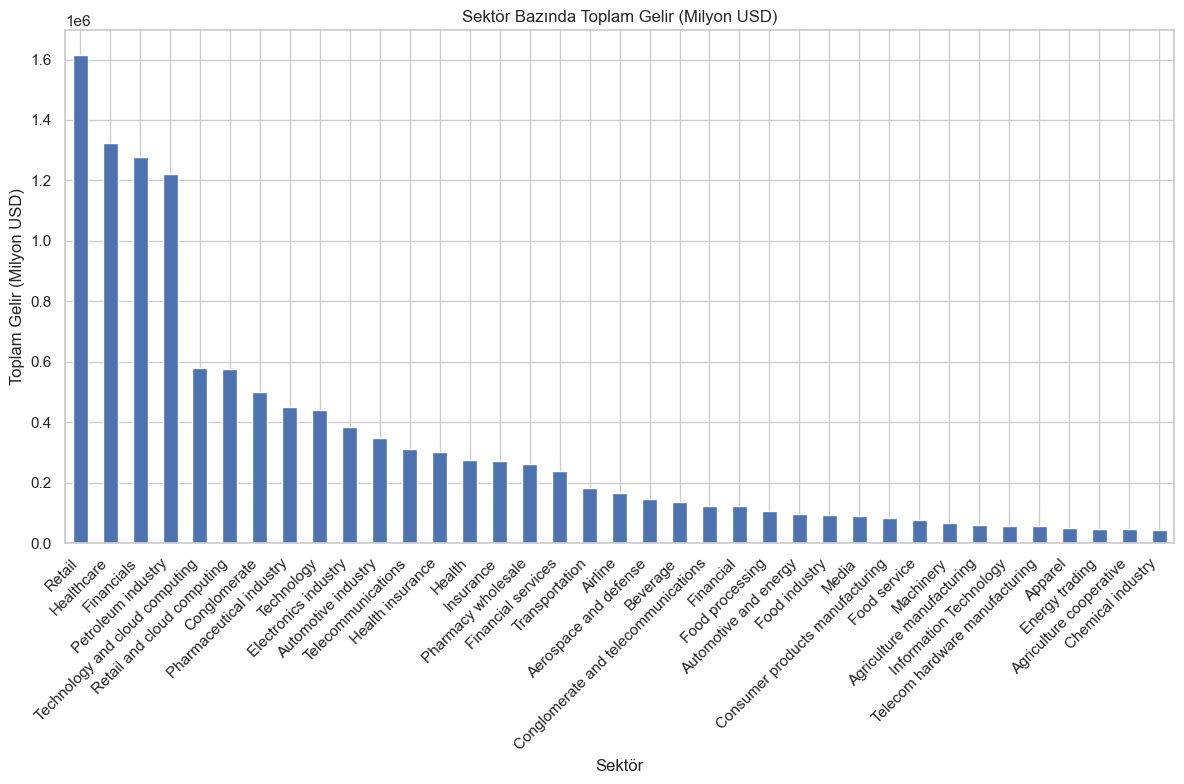

In [34]:
# Sektör bazında toplam gelir
sector_revenue = df.groupby('Industry')['Revenue (USD millions)'].sum().sort_values(ascending=False)
print("\nSektör bazında toplam gelir (milyon USD):")
print(sector_revenue)

import matplotlib.pyplot as plt
import seaborn as sns

# Grafiklerde daha estetik görünüm için seaborn stili seçelim
sns.set(style="whitegrid")

# Sektör bazında toplam gelir grafiği
plt.figure(figsize=(12, 8))
sector_revenue.plot(kind='bar')
plt.title('Sektör Bazında Toplam Gelir (Milyon USD)')
plt.ylabel('Toplam Gelir (Milyon USD)')
plt.xlabel('Sektör')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Sektör bazında toplam çalışan sayısı:
Industry
Retail                                 4799750
Retail and cloud computing             1525000
Healthcare                             1184620
Financials                             1040903
Transportation                          828950
Conglomerate                            706500
Technology and cloud computing          700102
Pharmaceutical industry                 643500
Technology                              563717
Beverage                                397100
Telecommunications                      392500
Automotive industry                     340000
Airline                                 338400
Financial services                      309926
Aerospace and defense                   293000
Insurance                               200216
Media                                   199125
Petroleum industry                      184673
Food processing                         173825
Electronics industry                    161000
Conglomerate

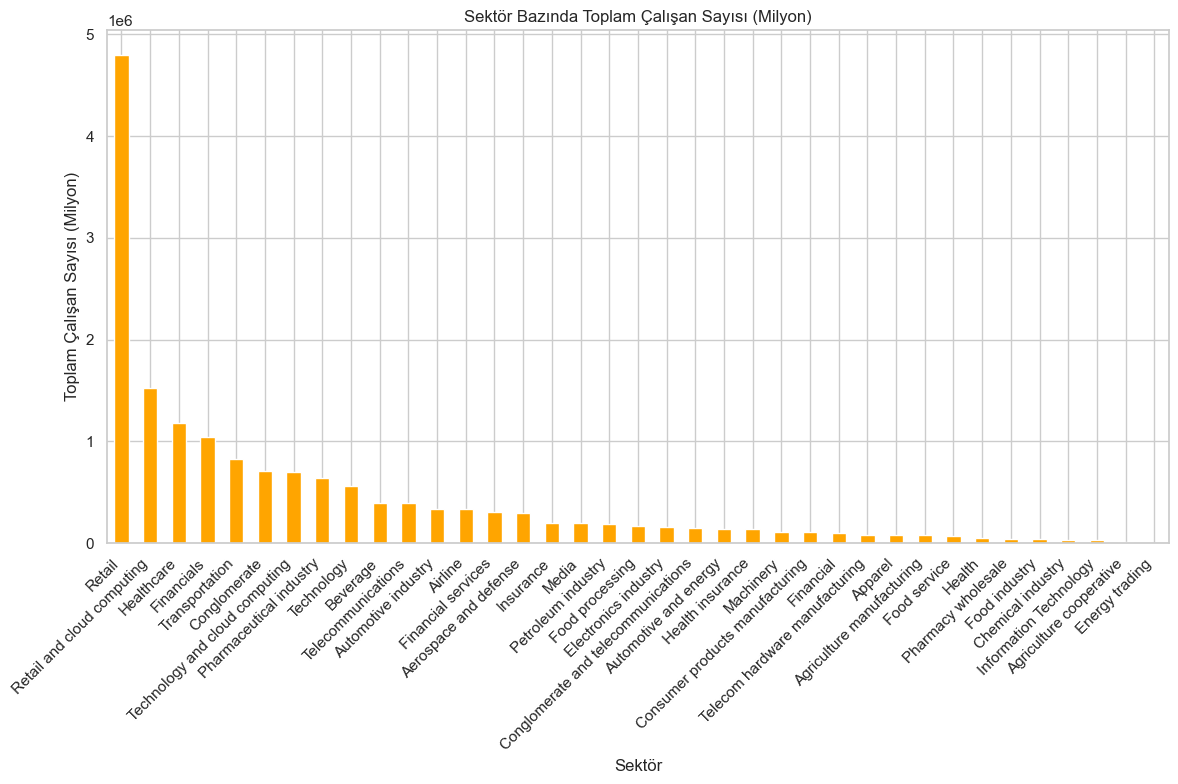

In [39]:
sector_employees = df.groupby('Industry')['Employees'].sum().sort_values(ascending=False)
print("\nSektör bazında toplam çalışan sayısı:")
print(sector_employees)

plt.figure(figsize=(12, 8))
sector_employees.plot(kind='bar', color='orange')
plt.title('Sektör Bazında Toplam Çalışan Sayısı (Milyon)')
plt.ylabel('Toplam Çalışan Sayısı (Milyon)')
plt.xlabel('Sektör')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **6. Gelir ve Büyüme Oranı Analizi**

Gelir dağılımı histogram ve boxplot ile incelendi.  
Büyüme oranlarının ortalaması, medyanı ve pozitif/negatif dağılımı gösterildi.

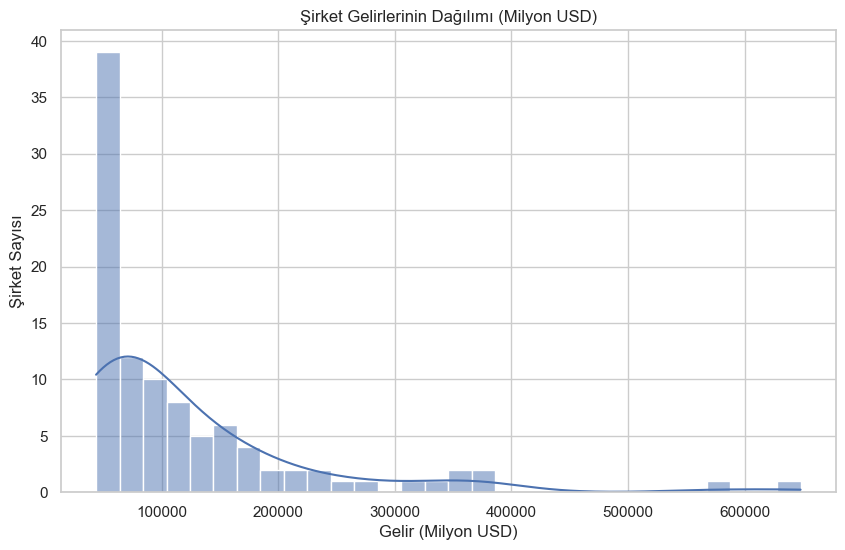

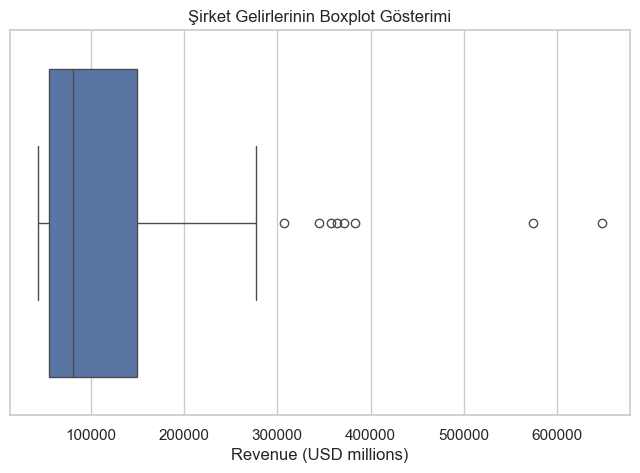

Büyüme oranı ortalaması: 6.08%
Büyüme oranı medyanı: 5.95%
Pozitif büyüme gösteren şirket sayısı: 64
Negatif büyüme gösteren şirket sayısı: 36

En hızlı büyüyen 5 şirket:
               Name  Revenue growth
64           Nvidia           125.9
34    Goldman Sachs            57.8
20        Citigroup            55.1
11   JPMorgan Chase            54.7
17  Bank of America            49.4

En hızlı küçülen 5 şirket:
                        Name  Revenue growth
68                    Pfizer           -41.7
67            ConocoPhillips           -28.7
98      Dow Chemical Company           -21.6
92  World Kinect Corporation           -19.2
28             Valero Energy           -18.8


In [40]:
# Gelir dağılımı histogramı
plt.figure(figsize=(10,6))
sns.histplot(df['Revenue (USD millions)'], bins=30, kde=True)
plt.title('Şirket Gelirlerinin Dağılımı (Milyon USD)')
plt.xlabel('Gelir (Milyon USD)')
plt.ylabel('Şirket Sayısı')
plt.show()

# Gelir dağılımı boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Revenue (USD millions)'])
plt.title('Şirket Gelirlerinin Boxplot Gösterimi')
plt.show()

# Büyüme oranı istatistikleri
print("Büyüme oranı ortalaması: {:.2f}%".format(df['Revenue growth'].mean()))
print("Büyüme oranı medyanı: {:.2f}%".format(df['Revenue growth'].median()))

# Pozitif ve negatif büyüme sayıları
pos_growth = (df['Revenue growth'] > 0).sum()
neg_growth = (df['Revenue growth'] < 0).sum()
print(f"Pozitif büyüme gösteren şirket sayısı: {pos_growth}")
print(f"Negatif büyüme gösteren şirket sayısı: {neg_growth}")

# En hızlı büyüyen 5 şirket
print("\nEn hızlı büyüyen 5 şirket:")
print(df[['Name', 'Revenue growth']].sort_values(by='Revenue growth', ascending=False).head())

# En hızlı küçülen 5 şirket
print("\nEn hızlı küçülen 5 şirket:")
print(df[['Name', 'Revenue growth']].sort_values(by='Revenue growth').head())

## **7. Çalışan Sayısı ve Gelir İlişkisi**

Scatter plot ile çalışan sayısı ve gelir arasındaki ilişki görselleştirildi.  
Korelasyon katsayısı hesaplandı ve gösterildi.

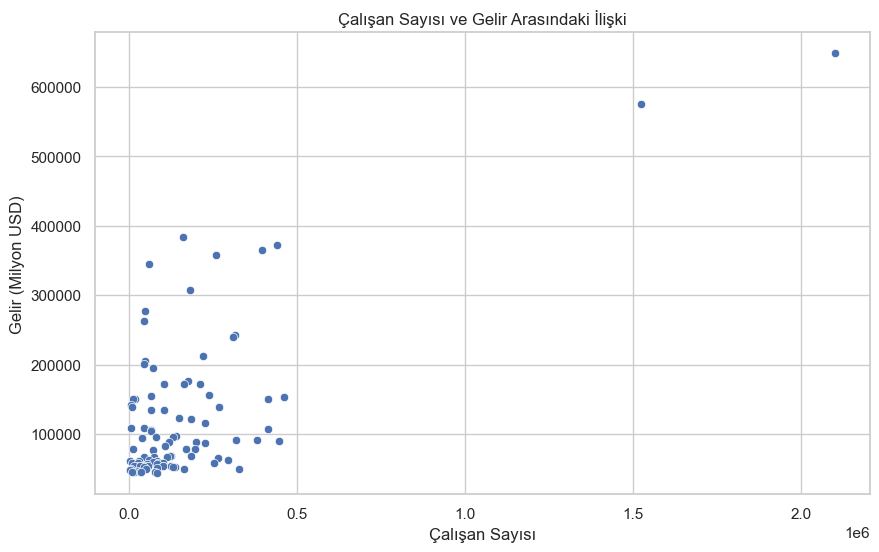

Çalışan sayısı ile gelir arasındaki korelasyon katsayısı: 0.70


In [41]:
# Scatter plot ile çalışan sayısı ve gelir ilişkisi
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Employees', y='Revenue (USD millions)')
plt.title('Çalışan Sayısı ve Gelir Arasındaki İlişki')
plt.xlabel('Çalışan Sayısı')
plt.ylabel('Gelir (Milyon USD)')
plt.show()

# Korelasyon katsayısı
corr = df['Employees'].corr(df['Revenue (USD millions)'])
print(f"Çalışan sayısı ile gelir arasındaki korelasyon katsayısı: {corr:.2f}")

## **8. Coğrafi Dağılım Analizi**

Genel merkez eyalet bilgisi çıkarıldı.  
Eyalet bazında şirket sayısı ve toplam gelir analiz edilip grafiklerle gösterildi.

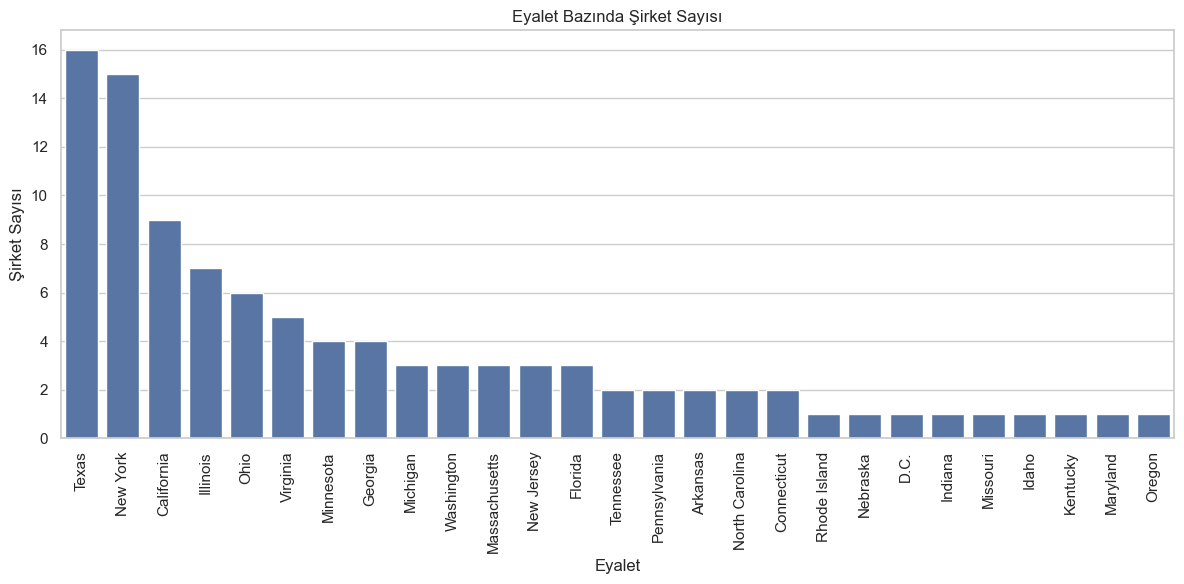

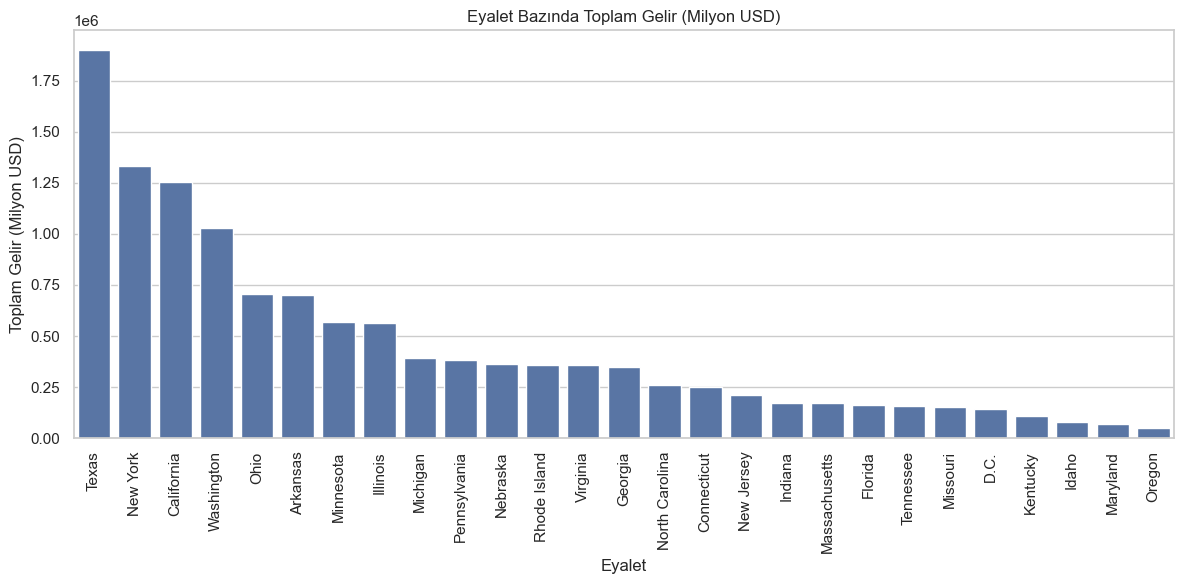

In [42]:
# Eyalet bilgisini Headquarters sütunundan ayıklar (son kelime olarak varsayıyoruz)
df['State'] = df['Headquarters'].apply(lambda x: x.split(',')[-1].strip())

# Eyalet bazında şirket sayısı
state_counts = df['State'].value_counts()

# Eyalet bazında toplam gelir
state_revenue = df.groupby('State')['Revenue (USD millions)'].sum().sort_values(ascending=False)

# Grafik: Eyalet bazında şirket sayısı
plt.figure(figsize=(12,6))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Eyalet Bazında Şirket Sayısı')
plt.ylabel('Şirket Sayısı')
plt.xlabel('Eyalet')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Grafik: Eyalet bazında toplam gelir
plt.figure(figsize=(12,6))
sns.barplot(x=state_revenue.index, y=state_revenue.values)
plt.title('Eyalet Bazında Toplam Gelir (Milyon USD)')
plt.ylabel('Toplam Gelir (Milyon USD)')
plt.xlabel('Eyalet')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **9. Kümelendirme (Clustering) Analizi**

K-Means ile şirketler gelir, büyüme ve çalışan sayısına göre kümelere ayrıldı.  
PCA ile boyut indirgeme yapılarak 2D görselleştirildi.

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Analizde kullanacağımız değişkenler
X = df[['Revenue (USD millions)', 'Revenue growth', 'Employees']]

# Veriyi standartlaştırır (ölçeklendir)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Kümelerin sayısı (örnek: 4 küme)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Küme sayıları
print(df['Cluster'].value_counts())

# Küme bazında ortalamalar
print(df.groupby('Cluster')[['Revenue (USD millions)', 'Revenue growth', 'Employees']].mean())

Cluster
0    60
3    31
1     7
2     2
Name: count, dtype: int64
         Revenue (USD millions)  Revenue growth     Employees
Cluster                                                      
0                 129944.633333        9.101667  1.540203e+05
1                 135575.857143       61.142857  1.631060e+05
2                 611455.000000        8.950000  1.812500e+06
3                  73096.451613      -12.393548  7.289781e+04


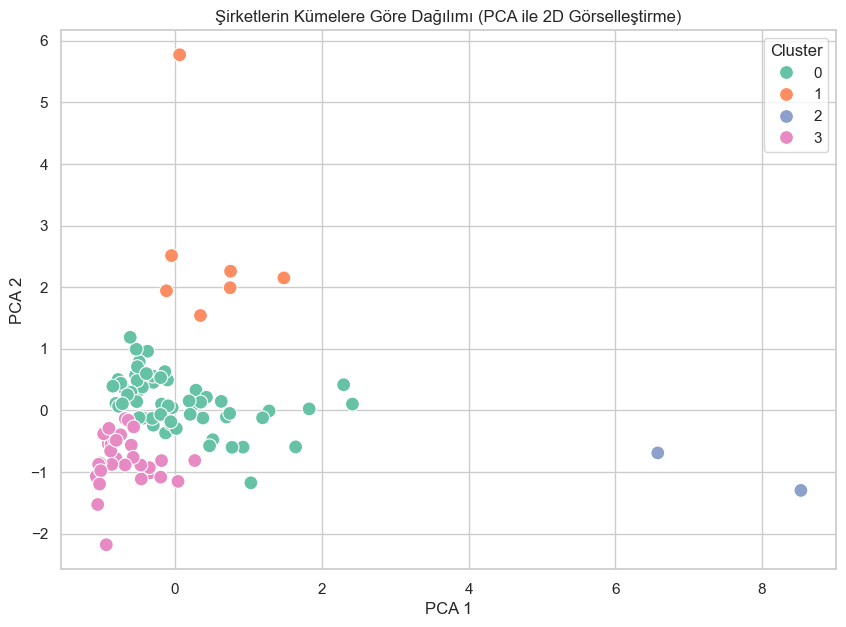

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='Set2', s=100)
plt.title('Şirketlerin Kümelere Göre Dağılımı (PCA ile 2D Görselleştirme)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

## **10. Küme Bazında Sektör Dağılımı**

Kümelerin sektör bazında dağılımı heatmap ile analiz edildi.

Industry  Aerospace and defense  Agriculture cooperative  \
Cluster                                                    
0                             2                        0   
1                             0                        0   
2                             0                        0   
3                             0                        1   

Industry  Agriculture manufacturing  Airline  Apparel  Automotive and energy  \
Cluster                                                                        
0                                 1        3        1                      1   
1                                 0        0        0                      0   
2                                 0        0        0                      0   
3                                 0        0        0                      0   

Industry  Automotive industry  Beverage  Chemical industry  Conglomerate  ...  \
Cluster                                                                   ...

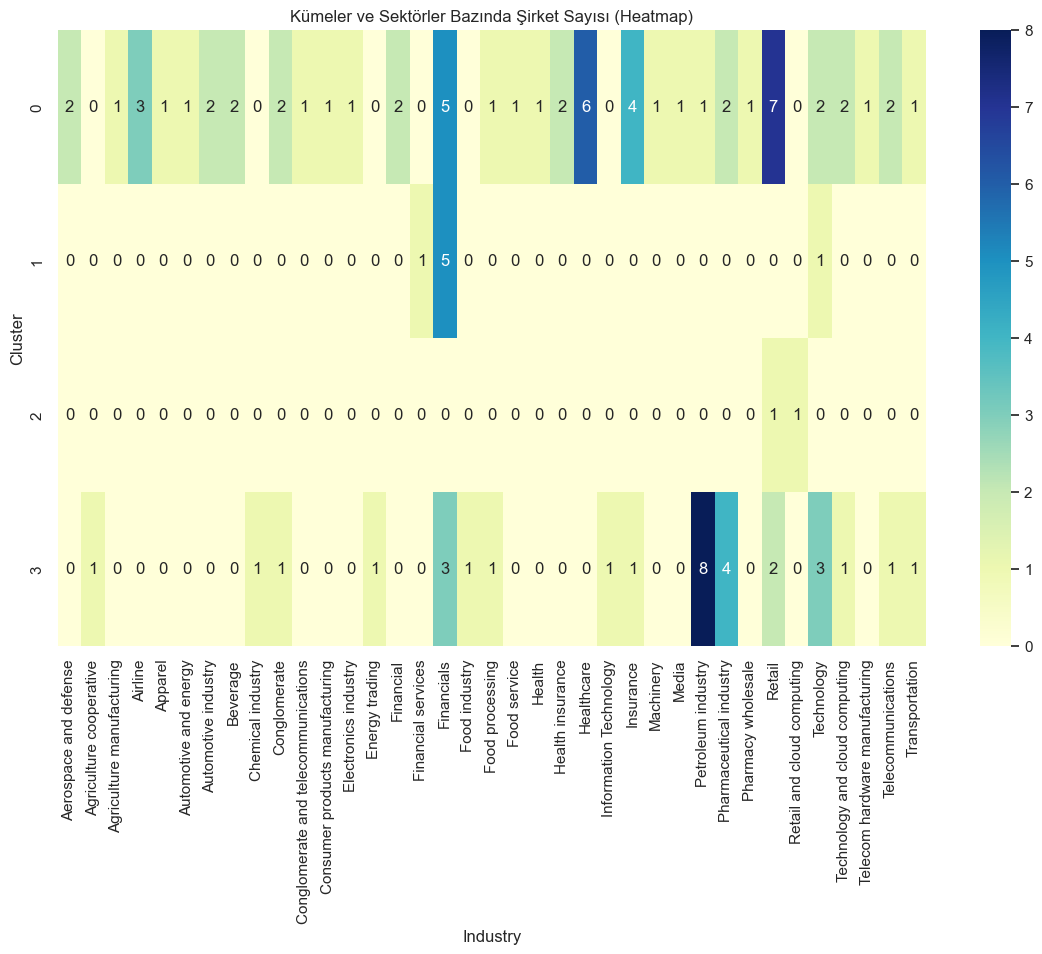

In [45]:
cluster_sector_counts = df.groupby(['Cluster', 'Industry']).size().unstack(fill_value=0)

# Küme başına sektör bazında şirket sayısı
print(cluster_sector_counts)

# Görselleştirmesi
plt.figure(figsize=(14,8))
sns.heatmap(cluster_sector_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Kümeler ve Sektörler Bazında Şirket Sayısı (Heatmap)')
plt.ylabel('Cluster')
plt.xlabel('Industry')
plt.show()

## **11. En Büyük 10 Şirketin Performans Analizi**

Gelir, büyüme oranı ve çalışan sayısı grafiklerle gösterildi.

                   Name  Revenue (USD millions)  Revenue growth  Employees
0               Walmart                648125.0             6.0    2100000
1                Amazon                574785.0            11.9    1525000
2                 Apple                383482.0            -2.8     161000
3    UnitedHealth Group                371622.0            14.6     440000
4    Berkshire Hathaway                364482.0            20.7     396500
5            CVS Health                357776.0            10.9     259500
6            ExxonMobil                344582.0           -16.7      61500
7              Alphabet                307394.0             8.7     182502
8  McKesson Corporation                276711.0             4.8      48000
9               Cencora                262173.0             9.9      44000


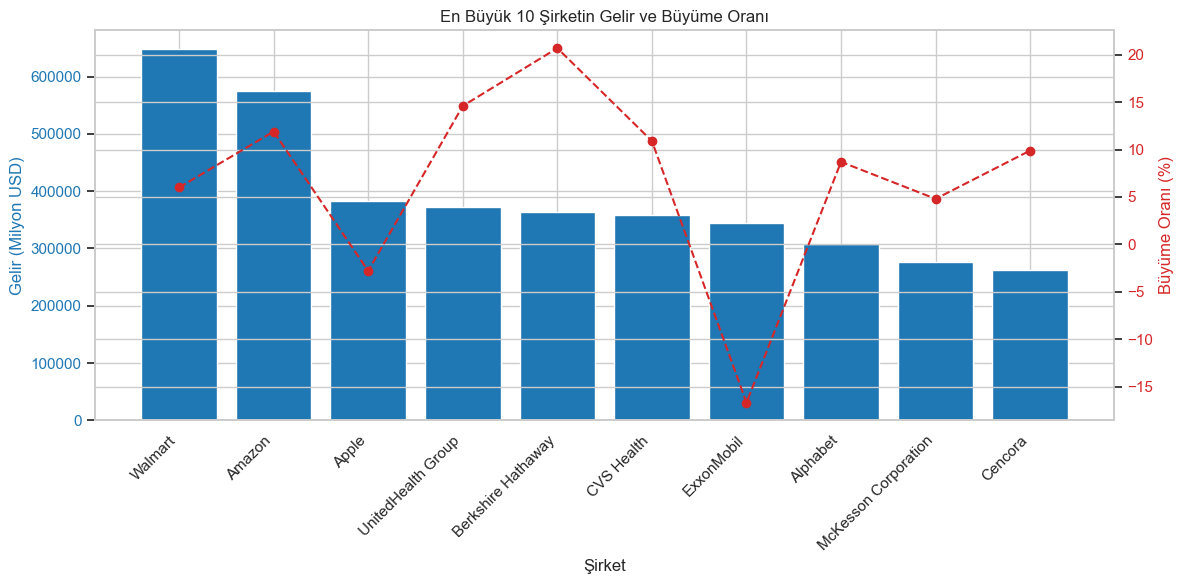

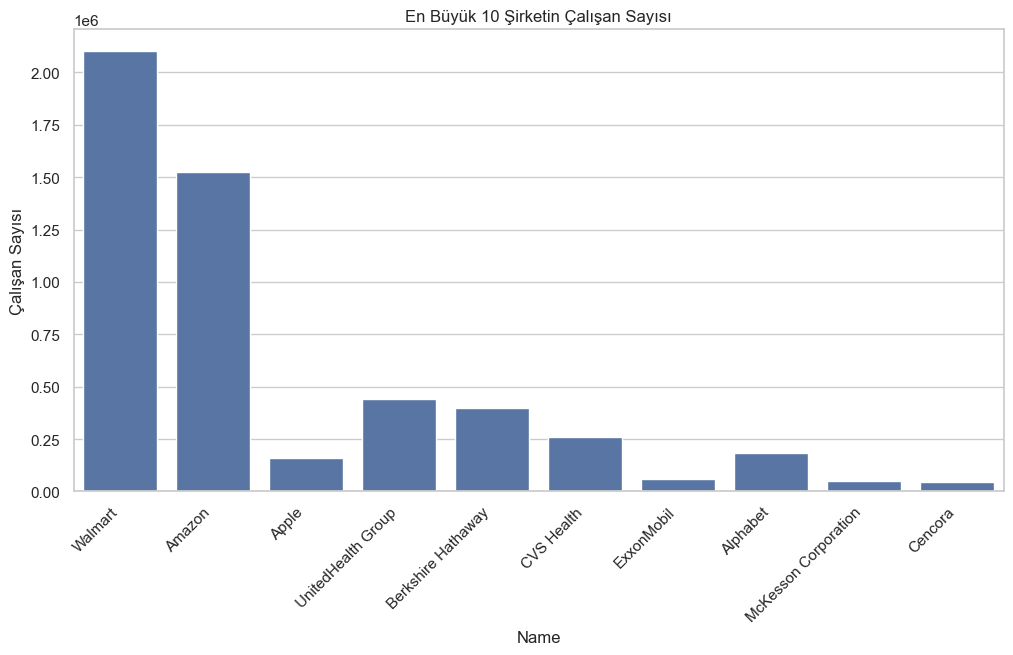

In [46]:
# En büyük 10 şirket (gelire göre)
top10 = df.sort_values(by='Revenue (USD millions)', ascending=False).head(10)

print(top10[['Name', 'Revenue (USD millions)', 'Revenue growth', 'Employees']])

# Grafik: En büyük 10 şirketin gelir ve büyüme oranı
fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:blue'
ax1.set_xlabel('Şirket')
ax1.set_ylabel('Gelir (Milyon USD)', color=color)
ax1.bar(top10['Name'], top10['Revenue (USD millions)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45, ha='right')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Büyüme Oranı (%)', color=color)
ax2.plot(top10['Name'], top10['Revenue growth'], color=color, marker='o', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('En Büyük 10 Şirketin Gelir ve Büyüme Oranı')
plt.tight_layout()
plt.show()

# Grafik: En büyük 10 şirketin çalışan sayısı
plt.figure(figsize=(12,6))
sns.barplot(x=top10['Name'], y=top10['Employees'])
plt.title('En Büyük 10 Şirketin Çalışan Sayısı')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Çalışan Sayısı')
plt.show()

## **12. Sonuçlar ve Öneriler**

Bu analizde ABD’nin en büyük şirketlerine ait veriler detaylı şekilde incelenmiştir.  
Başlıca çıkarımlar ve öneriler şunlardır:

- **Sektörel Yoğunluk:** Petrol, sağlık ve teknoloji sektörleri hem şirket sayısı hem de toplam gelir açısından öne çıkmaktadır.  
- **Gelir ve Çalışan Sayısı:** Gelir ile çalışan sayısı arasında yaklaşık **0.7** gibi güçlü ve pozitif bir korelasyon bulunmaktadır. Bu, büyük ölçekli şirketlerin daha fazla istihdam yarattığını göstermektedir.  
- **Büyüme Eğilimleri:** Şirketlerin önemli bir kısmı pozitif büyüme göstermekte, ancak bazı sektörlerde küçülme eğilimleri gözlenmektedir.  
- **Coğrafi Dağılım:** Texas, New York ve California eyaletleri en fazla büyük şirkete ev sahipliği yapmaktadır.  
- **Kümeleme Sonuçları:** Şirketler, gelir, büyüme ve çalışan sayısı özelliklerine göre **4 anlamlı kümeye** ayrılmıştır:  
  - **Cluster 0 ve 1:** Orta ölçekli, pozitif büyüme gösteren şirketler, çalışan sayısı yaklaşık 150-160 bin arası.  
  - **Cluster 2:** Çok yüksek gelir ve çalışan sayısına sahip büyük şirketler (örneğin Walmart gibi devler).  
  - **Cluster 3:** Daha küçük ölçekli, negatif büyüme gösteren şirketler.

**Öneriler:**  
- Daha ayrıntılı zaman serisi verisi ile yıllık büyüme trendleri analiz edilmelidir.  
- Sektörel özel analizlerle risk ve fırsat değerlendirmeleri yapılabilir.  
- Coğrafi ve ekonomik faktörler detaylı incelenerek şirket performansı etkileyen dışsal etkenler analiz edilebilir.

Bu analiz, büyük ölçekli şirketlerin yapısını anlamak ve stratejik karar süreçlerine katkı sağlamak için temel oluşturabilir.
